<a href="https://colab.research.google.com/github/duongnghiephuy/Practice-Simple-Deep-learning/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras.utils import to_categorical
import numpy as np
from keras import models
from keras import layers


Using TensorFlow backend.


We make use of the imdb dataset packed in Keras that contains film reviews.
The aim is to set up a model that can learn to classify reviews by sentiments(positive or negative.)



In [5]:
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)
print("Shape of train data",train_data.shape)
print("Shape of test data",test_data.shape)



Shape of train data (25000,)
Shape of test data (25000,)


We load the train and test set. The keyword num_words=10000 means we only import words that are 1000 most frequently used.


In [6]:
x=imdb.get_word_index()
reverse={value:key for (key,value) in x.items()}
decode=" ".join(reverse.get(i-3,"?") for i in train_data[0])
print("The first data point is:\n",decode)
print("The label is", train_label[0],": positive")
  


  

The first data point is:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what th

We take a look at the train data. As the reviews are encoded, wehave to decode to see the original reviews. 

In [0]:
def vectorize_sequence(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

train=vectorize_sequence(train_data)
test=vectorize_sequence(test_data)

train_label=np.asarray(train_label).astype("float32")
test_label=np.asarray(test_label).astype("float32")

train_val=train[:10000]
partial_data=train[10000:]
label_val=train_label[:10000]
partial_label=train_label[10000:]



As the data is not in the form of proper 2D float tensor, we have to one-hot code the data. Only 10000 most common words are used so the 2D float tensor is of shape((len(data),10000)).
Each transformed data point X then is a vector of 0 and 1 such that X[i]=1 if i appears in the original data point. 

The training set is cut into a partial training set and a validation set. The validation set is used as an indication of trained model's generalization power that we can try to improve. 


In [0]:
from keras import regularizers

The model structure is a linear stack of Denses layer.
- The output unit utilizes sigmoid function to output a single value which is the probability of belonging to class 1.

To improve accuracy:
- Tweak the layers' capacity(dimension of layers' output). A low capacity cannot capture predictive representations, resulting in underfitting.
- Regularizer is used as a constrain so that the model tends to learn a simple model(small weights). In fact, it is a constrain of the optimization process.
    + L1:
    + L2:
    
  After a few runs of both L1 and L2 with different parameters, l1(0.001) produces the best result.

In [0]:
network = models.Sequential()
network.add(layers.Dense(64,activation="relu",input_shape=(10000,),kernel_regularizer=regularizers.l1(0.001)),)

network.add(layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l1(0.001)))

network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
history=network.fit(partial_data,partial_label,epochs=15,batch_size=512,validation_data=(train_val,label_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 4s 263us/step - loss: 2.5497 - acc: 0.6823 - val_loss: 1.2542 - val_acc: 0.8136
Epoch 2/15
15000/15000 [==============================] - 2s 164us/step - loss: 1.2072 - acc: 0.7825 - val_loss: 1.1354 - val_acc: 0.8023
Epoch 3/15
15000/15000 [==============================] - 2s 163us/step - loss: 1.0916 - acc: 0.8135 - val_loss: 1.0219 - val_acc: 0.8324
Epoch 4/15
15000/15000 [==============================] - 2s 162us/step - loss: 0.9652 - acc: 0.8203 - val_loss: 0.9379 - val_acc: 0.7930
Epoch 5/15
15000/15000 [==============================] - 2s 161us/step - loss: 0.8703 - acc: 0.8303 - val_loss: 0.9051 - val_acc: 0.7918
Epoch 6/15
15000/15000 [==============================] - 2s 162us/step - loss: 0.8296 - acc: 0.8340 - val_loss: 0.7901 - val_acc: 0.8492
Epoch 7/15
15000/15000 [==============================] - 2s 165us/step - loss: 0.7886 - acc: 0.8451 - val_loss: 0.7778 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


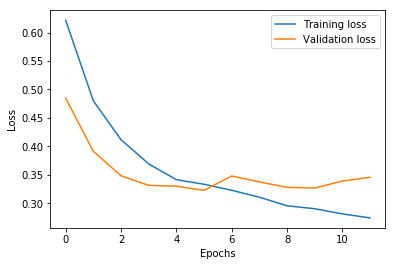

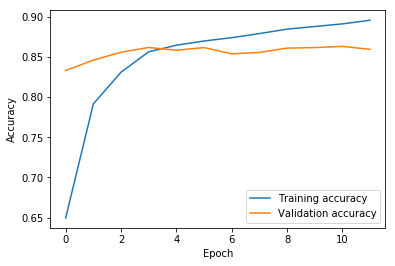

In [0]:
import matplotlib.pyplot as plt
his_dict=history.history
print(his_dict.keys())
plt.plot(range(len(his_dict["loss"])),his_dict["loss"],label="Training loss")
plt.plot(range(len(his_dict["loss"])),his_dict["val_loss"],label="Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(range(len(his_dict["acc"])),his_dict["acc"],label="Training accuracy")
plt.plot(range(len(his_dict["val_acc"])),his_dict["val_acc"],label="Validation accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()




We plot the training and validation process so that we can choose the epoch that yeilds the best result. The model starts overfitting after 4 epochs so we should stop training from there.

Finally, the model is trained on the entire training set and with parameters found above.
The test accuracy is quite good 86%.

In [0]:
network = models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
network.add(layers.Dense(16,activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
history=network.fit(train,train_label,epochs=4,batch_size=512)
print(network.evaluate(test,test_label))

Epoch 1/4
25000/25000 [==============================] - 4s 152us/step - loss: 0.5253 - acc: 0.7813
Epoch 2/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.3713 - acc: 0.8538
Epoch 3/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.3297 - acc: 0.8646
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step
[0.33042319494247435, 0.86076]
